# EDA of IPL 2008-2019

The dataset consists of data about IPL matches played from the year 2008 to 2019. IPL is a professional Twenty20 cricket league founded by the Board of Control for Cricket in India (BCCI) in 2008. The league has 8 teams representing 8 different Indian cities or states. It enjoys tremendous popularity and the brand value of the IPL in 2019 was estimated to be ₹475 billion (US$6.7 billion).

Content: 

**Data till Season 11 (2008 - 2019)**

**matches.csv - Match by match data**

**deliveries.csv - Ball by ball data**



## Downloading the Dataset

The dataset used is sourced from https://www.kaggle.com/nowke9/ipldata (Click here to download)

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
dataset_url = 'https://www.kaggle.com/nowke9/ipldata' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./ipldata" (use force=True to force download)


The dataset has been downloaded and extracted.

In [4]:
data_dir = './ipldata'

In [5]:
import os
os.listdir(data_dir)

['matches.csv', 'deliveries.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "eda-of-ipl" 

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "nazneen-alam31/eda-of-ipl" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/nazneen-alam31/eda-of-ipl


'https://jovian.ai/nazneen-alam31/eda-of-ipl'

## Data Preparation and Cleaning

Now we will be using various modes of displaying dataset which is in CSV format.At first we will be loading the data using pandas read_csv function.Followed by storing the data in mutidimensional table called as dataframe.

Let's start by reading the csv file to Pandas DataFrame.



In [10]:
import pandas as pd
import numpy as np

In [11]:
ipl_matches_df=pd.read_csv('./ipldata/matches.csv')
ipl_deliveries_df=pd.read_csv('./ipldata/deliveries.csv')

In [12]:
ipl_matches_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [13]:
ipl_deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


#### Total number of IPL matches till 2019

In [14]:
ipl_matches_df.shape

(756, 18)

 756 number of IPL matches were held till 2019

In [15]:
ipl_matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [16]:
ipl_matches_df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


### Observations
These are the inferences that can be made from the describe() method:
* The .csv file has data of IPL matches starting from the season 2008 to 2019.
* **Biggest margin of victory for the team batting first(win_by_runs) is 146 runs.**
* **Biggest victory of the team batting second(win_by_wickets) is by 10 wickets.**
* **75% of the victorious teams that bat first won by a margin of 19 runs.**
* **75% of the victorious teams that bat second won by a margin of 6 wickets.**
* **There were 756 IPL matches hosted from 2008 to 2019.**

In [17]:
ipl_matches_df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [18]:
ipl_matches_df.isnull().sum().sort_values()

id                   0
venue                0
win_by_wickets       0
win_by_runs          0
dl_applied           0
toss_decision        0
result               0
team2                0
team1                0
date                 0
season               0
toss_winner          0
umpire2              2
umpire1              2
winner               4
player_of_match      4
city                 7
umpire3            637
dtype: int64

The column 'umpire3' has a significant number of NaN values. As the off-field umpire parameter is insignificant, we can drop this column. The other columns that have Nan values are of type object(Pandas equivalent of Python String data type) and are very few in number(<=7).

#### Handling missing data:

In [19]:
ipl_matches_df.drop('umpire3',axis=1,inplace=True)

In [20]:
ipl_matches_df.head(5) #Ensuring umpire3 column is dropped

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [21]:
ipl_matches_df.shape # After dropping the umpire3 column

(756, 17)

In [22]:
ipl_matches_df.team1.value_counts()

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Rising Pune Supergiants          7
Kochi Tuskers Kerala             7
Delhi Capitals                   6
Name: team1, dtype: int64

#### Matches per season:

In [23]:
ipl_matches_df.season.value_counts()

2013    76
2012    74
2011    73
2010    60
2014    60
2016    60
2018    60
2019    60
2015    59
2017    59
2008    58
2009    57
Name: season, dtype: int64

#### Now let's rename the teams and add their acronyms :

In [24]:
ipl_matches_df.replace(to_replace=['Delhi Daredevils','Rising Pune Supergiants'],value=['Delhi Capitals','Rising Pune Supergiant'],inplace=True)
ipl_deliveries_df.replace(to_replace=['Delhi Daredevils','Rising Pune Supergiants'],value=['Delhi Capitals','Rising Pune Supergiant'],inplace=True)

In [25]:
ipl_teams_dic = { 'Mumbai Indians':'MI', 'Kolkata Knight Riders':'KKR','Sunrisers Hyderabad' : 'SRH', 
                    'Royal Challengers Bangalore' : 'RCB','Delhi Capitals' : 'DC', 
                    'Kings XI Punjab' : 'KXIP','Chennai Super Kings' : 'CSK', 'Rajasthan Royals' : 'RR',
                     'Gujarat Lions' : 'GL', 'Deccan Chargers' : 'DEC', 'Kochi Tuskers Kerala' : 'KTK',
                     'Pune Warriors' : 'PWI', 'Rising Pune Supergiant' : 'RPS'
                }

#Replacing full team names with acronyms.
ipl_matches_df.replace(ipl_teams_dic,inplace=True)
ipl_deliveries_df.replace(ipl_teams_dic,inplace=True)

In [26]:
ipl_matches_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,RPS,KXIP,KXIP,field,normal,0,KXIP,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,RCB,DC,RCB,bat,normal,0,RCB,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [27]:
ipl_deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [28]:
import jovian

In [29]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "nazneen-alam31/eda-of-ipl" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/nazneen-alam31/eda-of-ipl


'https://jovian.ai/nazneen-alam31/eda-of-ipl'

## Exploratory Analysis and Visualization

Now that the data set has been cleaned up, let's do the in-depth analysis and visualization.

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [30]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (16, 8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## The winning percentage of each teams:

Let's start analyzing the winning percentage of each team.

In [31]:
win_percent=((ipl_matches_df.winner.value_counts())/((ipl_matches_df.team1.value_counts())+(ipl_matches_df.team2.value_counts())))*100
winning_percent=win_percent.sort_values(ascending=False)
winning_percent

CSK     60.975610
MI      58.288770
SRH     53.703704
KKR     51.685393
RR      51.020408
RPS     50.000000
RCB     46.666667
KXIP    46.590909
DC      43.502825
GL      43.333333
KTK     42.857143
DEC     38.666667
PWI     26.086957
dtype: float64

In [32]:
winning_percent_df=pd.DataFrame({"Teams": list(dict(winning_percent).keys()),"Winning Percentage": list(dict(winning_percent).values())})
winning_percent_df


,Teams,Winning Percentage
0,CSK,60.975610
1,MI,58.288770
2,SRH,53.703704
3,KKR,51.685393
4,RR,51.020408
5,RPS,50.000000
6,RCB,46.666667
7,KXIP,46.590909
8,DC,43.502825
9,GL,43.333333


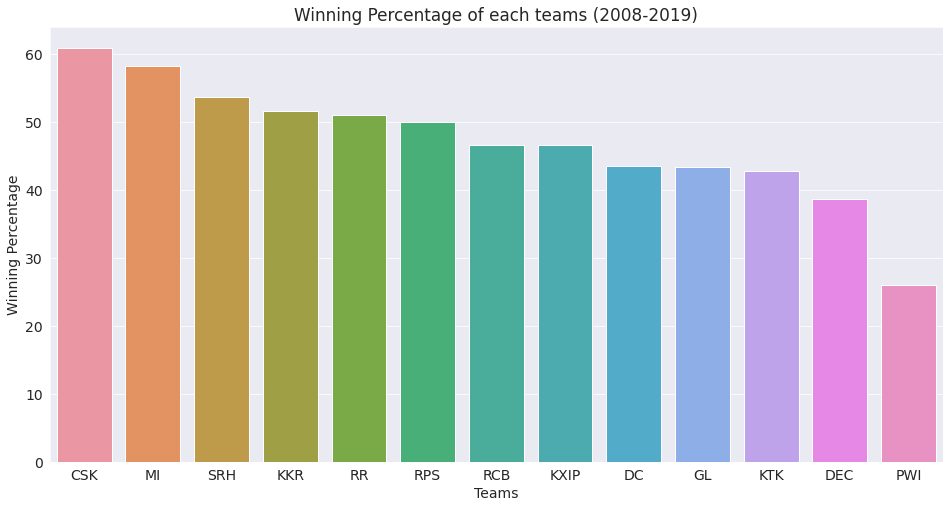

In [33]:
sns.barplot(x='Teams',y='Winning Percentage',data=winning_percent_df).set(title="Winning Percentage of each teams (2008-2019)");

### Observations: 
Chennai Super Kings has the maximum winning percentage followed by Mumbai Indians.
There is a testimony to the unpredictability of IPL.

## Number of matches played by each teams:

In [34]:
ipl_match_played=(ipl_matches_df.team1.value_counts()+ipl_matches_df.team2.value_counts()).sort_values(ascending=False)
ipl_match_played

MI      187
RCB     180
KKR     178
DC      177
KXIP    176
CSK     164
RR      147
SRH     108
DEC      75
PWI      46
GL       30
RPS      30
KTK      14
dtype: int64

In [35]:
print("Maximum number of IPL matches played by the team is: ",ipl_match_played.keys()[0],ipl_match_played.values[0],"matches.")

Maximum number of IPL matches played by the team is:  MI 187 matches.


In [36]:
ipl_match_played_df=pd.DataFrame({"Teams":list(dict(ipl_match_played).keys()),"Matches Played":list(dict(ipl_match_played).values())})
ipl_match_played_df

,Teams,Matches Played
0,MI,187
1,RCB,180
2,KKR,178
3,DC,177
4,KXIP,176
5,CSK,164
6,RR,147
7,SRH,108
8,DEC,75
9,PWI,46


''

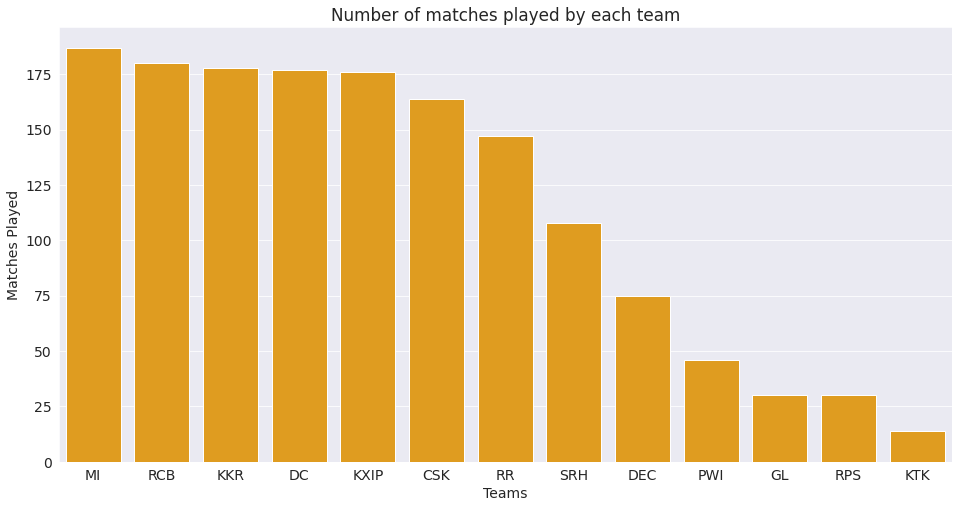

In [37]:
sns.barplot(x='Teams',y='Matches Played',color='orange',data=ipl_match_played_df).set(title="Number of matches played by each team")
;

### Observations:
Mumbai Indians has played maximum number of IPL matches followed by RCB(Royal Challengers Bangalore)

## Number of seasons played by each teams:

In [38]:
t1=ipl_matches_df.team1.unique()
dicti={}

for values in t1:
    dicti[values]=0
for season_no in ipl_matches_df.groupby('season'):
    for team in dicti:
        if team in season_no[1].team1.unique():
            dicti[team]+=1


sort_teams_dict=sorted(dicti.items(),key=lambda x:x[1],reverse=True)

for i in sort_teams_dict:
    print(i[0],i[1])

MI 12
RCB 12
KKR 12
DC 12
KXIP 12
CSK 10
RR 10
SRH 7
DEC 5
PWI 3
GL 2
RPS 2
KTK 1


In [39]:
iplseason_by_teams_df=pd.DataFrame({"Teams":list(dict(sort_teams_dict).keys()),"Season Played":list(dict(sort_teams_dict).values())})
iplseason_by_teams_df

,Teams,Season Played
0,MI,12
1,RCB,12
2,KKR,12
3,DC,12
4,KXIP,12
5,CSK,10
6,RR,10
7,SRH,7
8,DEC,5
9,PWI,3


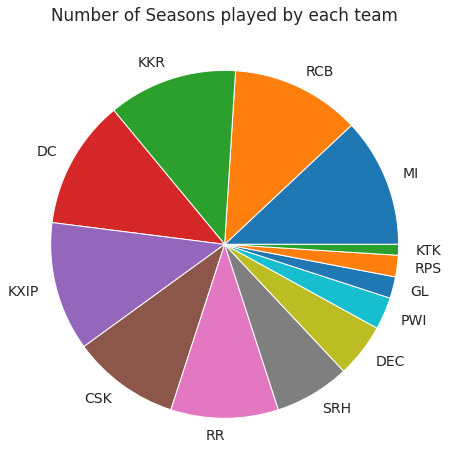

In [40]:
plt.title("Number of Seasons played by each team")
plt.pie(iplseason_by_teams_df['Season Played'],labels=iplseason_by_teams_df['Teams']);

### Observations:
MI, RCB, KKR, DC, KXIP has played 12 seasons ,i.e, the most number of seasons followed by CSK & RR who played 10 seasons

## Man of the match(MoM) Analysis:

In [41]:
player=ipl_matches_df.player_of_match.value_counts()
player

CH Gayle          21
AB de Villiers    20
MS Dhoni          17
RG Sharma         17
DA Warner         17
                  ..
P Shaw             1
M Kartik           1
GJ Bailey          1
S Anirudha         1
M Ur Rahman        1
Name: player_of_match, Length: 226, dtype: int64

In [42]:
mom_df=player.head(15).to_frame().reset_index().rename(columns={"index":"Players","player_of_match":"MoM Count"})
mom_df

,Players,MoM Count
0,CH Gayle,21
1,AB de Villiers,20
2,MS Dhoni,17
3,RG Sharma,17
4,DA Warner,17
5,YK Pathan,16
6,SR Watson,15
7,SK Raina,14
8,G Gambhir,13
9,MEK Hussey,12


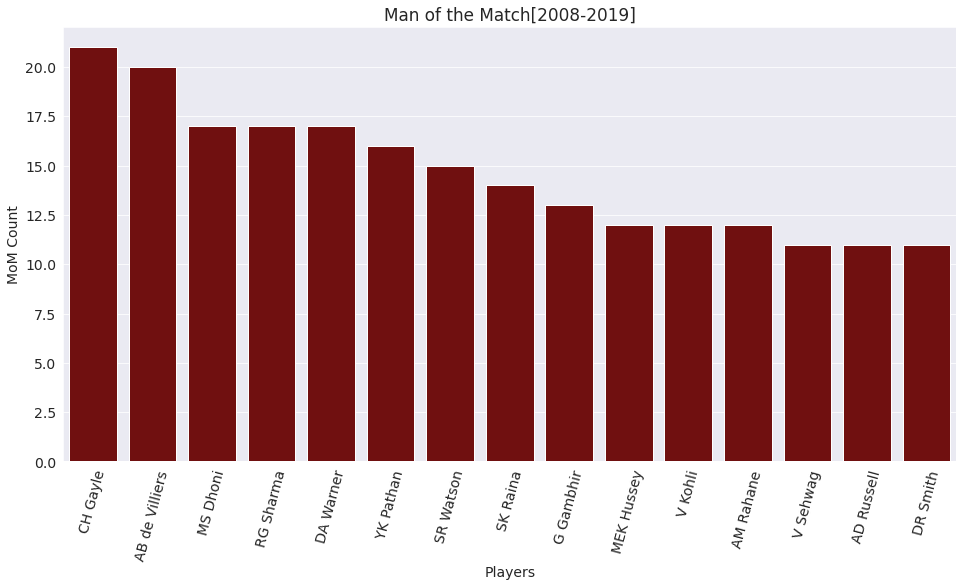

In [43]:
plt.xticks(rotation=75)

sns.barplot(x='Players',y='MoM Count',color='maroon',data=mom_df).set(title='Man of the Match[2008-2019]');

### Observations:
Chris Gayle has been awarded Man of The Match most of the times followed by AB de Villiers.

Let us save and upload our work to Jovian before continuing

In [44]:
import jovian

In [45]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "nazneen-alam31/eda-of-ipl" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/nazneen-alam31/eda-of-ipl


'https://jovian.ai/nazneen-alam31/eda-of-ipl'

## Asking and Answering Questions

Let's have a quick session of questions and answers on EDA of IPL(2008-2019)



## Q1: Which city has hosted maximum number of IPL matches?

In [46]:
place=list(ipl_matches_df.city.unique())

print(len(place),"Cities hosted IPL matches till now.")
print(place)

33 Cities hosted IPL matches till now.
['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai', 'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi', 'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan, 'Mohali', 'Bengaluru']


In [47]:
cities=ipl_matches_df.city.value_counts()
cities

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Ahmedabad          12
Centurion          12
Mohali             10
Rajkot             10
Dharamsala          9
Indore              9
Johannesburg        8
Cape Town           7
Port Elizabeth      7
Cuttack             7
Abu Dhabi           7
Ranchi              7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
East London         3
Kimberley           3
Bloemfontein        2
Name: city, dtype: int64

In [48]:
cities_df=cities.to_frame().reset_index().rename(columns={'index':'Cities','city':'Match Hosted'})
cities_df

,Cities,Match Hosted
0,Mumbai,101
1,Kolkata,77
2,Delhi,74
3,Bangalore,66
4,Hyderabad,64
5,Chennai,57
6,Jaipur,47
7,Chandigarh,46
8,Pune,38
9,Durban,15


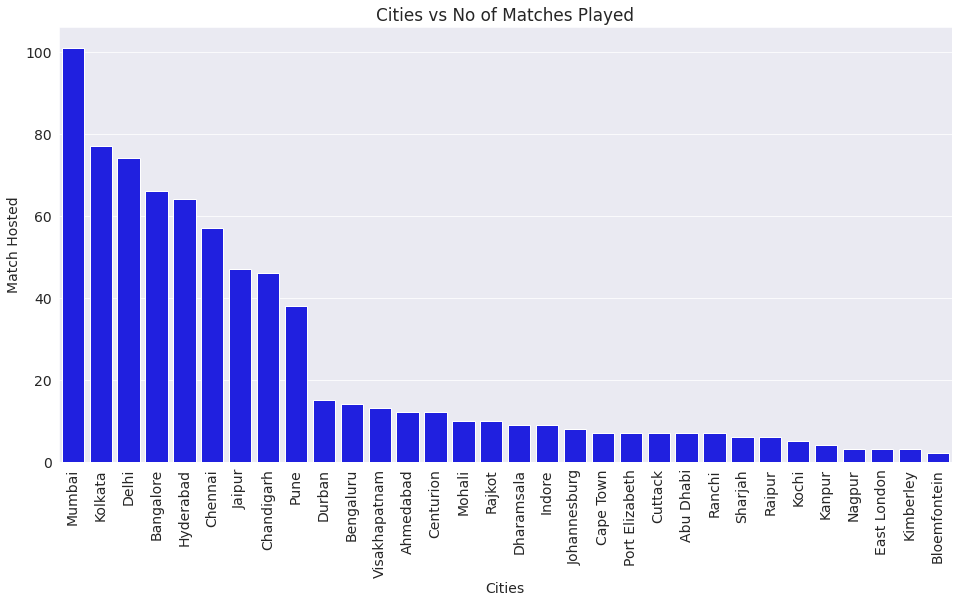

In [49]:
plt.xticks(rotation=90)

sns.barplot(x='Cities',y='Match Hosted',color='blue',data=cities_df).set(title='Cities vs No of Matches Played');

### Answer:
Mumbai city has hosted maximum number of IPL matches.

## Q2: Which are the top 10 venues of IPL matches?

In [50]:
top_10_venue=ipl_matches_df.venue.value_counts().head(10)
top_10_venue

Eden Gardens                                  77
Wankhede Stadium                              73
M Chinnaswamy Stadium                         73
Feroz Shah Kotla                              67
Rajiv Gandhi International Stadium, Uppal     56
MA Chidambaram Stadium, Chepauk               49
Sawai Mansingh Stadium                        47
Punjab Cricket Association Stadium, Mohali    35
Maharashtra Cricket Association Stadium       21
Dr DY Patil Sports Academy                    17
Name: venue, dtype: int64

In [51]:
top_10_venue_df=pd.DataFrame({'Venue':top_10_venue.index,
                             'Count':top_10_venue.values})
top_10_venue_df

,Venue,Count
0,Eden Gardens,77
1,Wankhede Stadium,73
2,M Chinnaswamy Stadium,73
3,Feroz Shah Kotla,67
4,"Rajiv Gandhi International Stadium, Uppal",56
5,"MA Chidambaram Stadium, Chepauk",49
6,Sawai Mansingh Stadium,47
7,"Punjab Cricket Association Stadium, Mohali",35
8,Maharashtra Cricket Association Stadium,21
9,Dr DY Patil Sports Academy,17


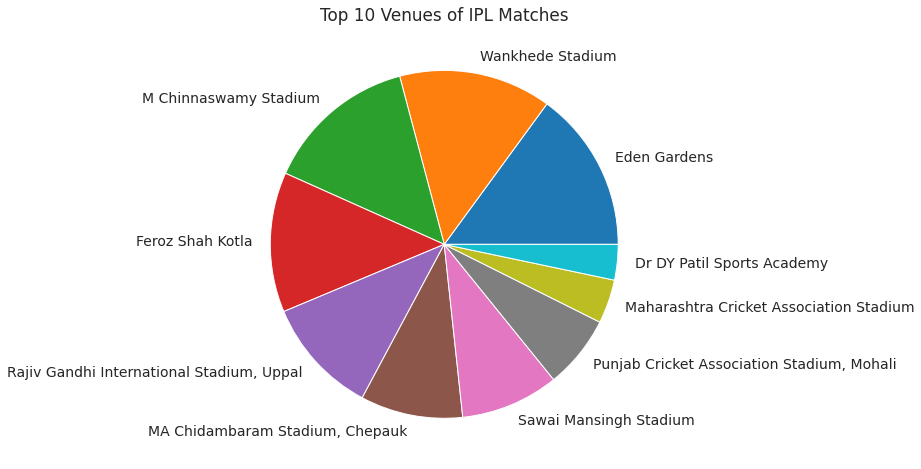

In [52]:
plt.title("Top 10 Venues of IPL Matches")

plt.pie(top_10_venue_df["Count"],labels=top_10_venue_df["Venue"]);

### Answer:
Eden Gardens which is in Kolkata tops the Venue list with 77 number of times matches being played there followed by Wankhede Stadium with 73 number of times matches being played there.

## Q3: Who are the most experienced IPL Umpires?

In [53]:
umpire1=list(ipl_matches_df.umpire1)
umpire2=list(ipl_matches_df.umpire2)

umpire1.extend(umpire2)

In [54]:
data=pd.DataFrame(umpire1,columns=['umpires'])
umpire_data=data.umpires.value_counts().head(10)

umpire_df=pd.DataFrame({'Umpires':umpire_data.index,
                       'Count':umpire_data.values})
umpire_df

,Umpires,Count
0,S Ravi,106
1,HDPK Dharmasena,87
2,C Shamshuddin,73
3,AK Chaudhary,58
4,SJA Taufel,55
5,M Erasmus,54
6,Asad Rauf,51
7,Nitin Menon,42
8,BR Doctrove,42
9,CK Nandan,41


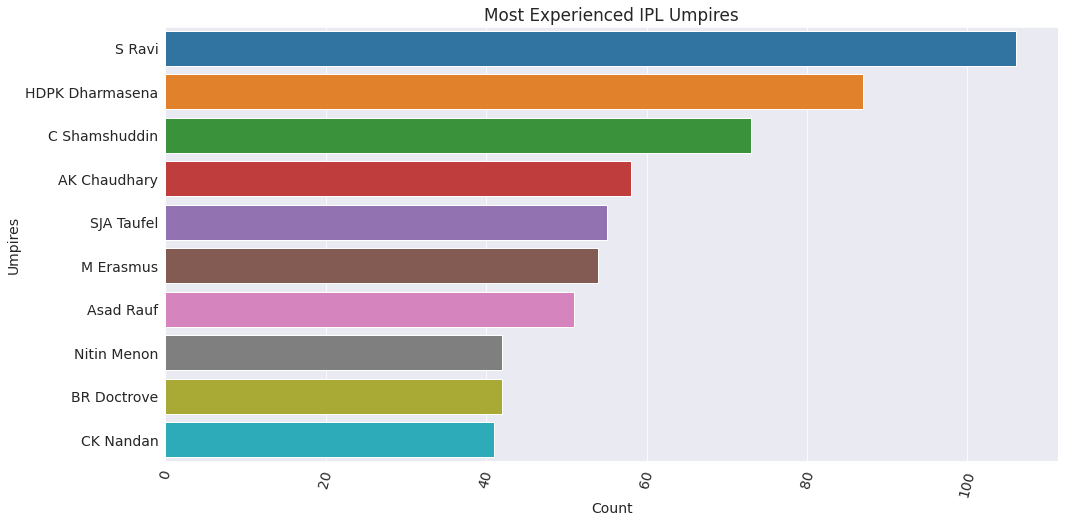

In [55]:
plt.xticks(rotation=75)

sns.barplot(x='Count',y='Umpires',data=umpire_df).set(title='Most Experienced IPL Umpires');

### Answer:
S Ravi is the most experienced umpire in the series of IPL matches of 2008-2019.

## Q4: Who were the Winners and Runner-ups in each season?

In [56]:
ls=[]
for val in ipl_matches_df.groupby('season'):
    if val[1].tail(1).winner.values[0]==val[1].tail(1).team1.values[0]:
        runner_up=val[1].tail(1).team2.values[0]
    else:
        runner_up=val[1].tail(1).team1.values[0]
    ls.append([val[0],val[1].tail(1).winner.values[0],runner_up])

print(ls)

[[2008, 'RR', 'CSK'], [2009, 'DEC', 'RCB'], [2010, 'CSK', 'MI'], [2011, 'CSK', 'RCB'], [2012, 'KKR', 'CSK'], [2013, 'MI', 'CSK'], [2014, 'KKR', 'KXIP'], [2015, 'MI', 'CSK'], [2016, 'SRH', 'RCB'], [2017, 'MI', 'RPS'], [2018, 'CSK', 'SRH'], [2019, 'MI', 'CSK']]


In [57]:
winner_df=pd.DataFrame(ls)
winner_df.rename(columns={0:'Season',1:'Winner',2:'Runner-up'})

,Season,Winner,Runner-up
0,2008,RR,CSK
1,2009,DEC,RCB
2,2010,CSK,MI
3,2011,CSK,RCB
4,2012,KKR,CSK
5,2013,MI,CSK
6,2014,KKR,KXIP
7,2015,MI,CSK
8,2016,SRH,RCB
9,2017,MI,RPS


In [58]:
season_winner_df=winner_df[1].value_counts().to_frame().reset_index().rename(columns={'index':'Winner',1:'Count'})
season_winner_df

,Winner,Count
0,MI,4
1,CSK,3
2,KKR,2
3,RR,1
4,SRH,1
5,DEC,1


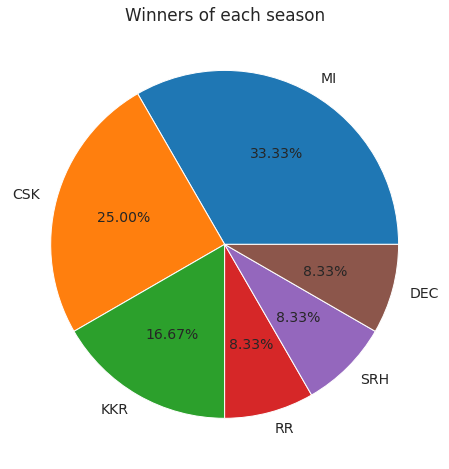

In [59]:
plt.title("Winners of each season")
plt.pie(season_winner_df["Count"],labels=season_winner_df["Winner"],autopct='%1.2f%%');

In [60]:
season_runner_ups_df=winner_df[2].value_counts().to_frame().reset_index().rename(columns={'index':'Runner-ups',2:'Count'})
season_runner_ups_df

,Runner-ups,Count
0,CSK,5
1,RCB,3
2,RPS,1
3,SRH,1
4,KXIP,1
5,MI,1


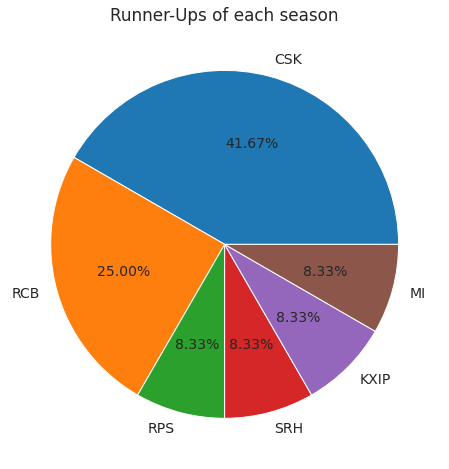

In [61]:
plt.title("Runner-Ups of each season")
plt.pie(season_runner_ups_df["Count"],labels=season_runner_ups_df["Runner-ups"],autopct='%1.2f%%');

### Answer:
Mumbai Indians has won 4 seasons and have been runner-ups for only one season.
Chennai Super kings has been runner-ups for 5 times and won 3 times.

## Q5: Does Winning toss plays a role in winning the match?

In [62]:
won=0
lost=0
for val in ipl_matches_df.index:
    if ipl_matches_df['toss_winner'][val]==ipl_matches_df['winner'][val]:
        won+=1
    else:
        lost+=1       

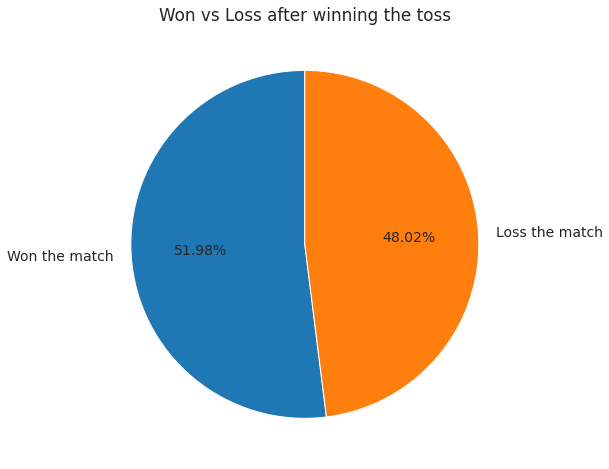

In [63]:
plt.title("Won vs Loss after winning the toss")
plt.pie((won,lost),labels=("Won the match","Loss the match"),autopct='%1.2f%%',startangle=90);

From the above pie chart it can be inferred that toss does play a little factor but thats not enough to win a match for a team, other factors like players form, venue, pitch conditions, humidity etc. can also lead to win or defeat a team.

Let us save and upload our work to Jovian before continuing.

In [64]:
import jovian

In [65]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "nazneen-alam31/eda-of-ipl" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/nazneen-alam31/eda-of-ipl


'https://jovian.ai/nazneen-alam31/eda-of-ipl'

## Inferences and Conclusion

Let’s summarize the important observations made during Exploratory Data Analysis:
* **Mumbai Indians is the most successful team in IPL**.
* **The Mumbai city has hosted the most number of IPL matches**.
* **Chris Gayle has won the maximum number of player of the match title**.
* **Winning toss gives a slight edge(52% probability of winning) against the opponents**.
* **S. Ravi(Sundaram Ravi) has officiated the most number of IPL matches on-field**.
* **Eden Gardens has hosted the maximum number of IPL matches**.
* **Till 2019, 40 venues have hosted 756 IPL matches**.
* **Mumbai Indians has won 4 seasons and have been runner-ups for only one season.**
* **Chennai Super kings has been runner-ups for 5 times and won 3 times.**

In [66]:
import jovian

In [67]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "nazneen-alam31/eda-of-ipl" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/nazneen-alam31/eda-of-ipl


'https://jovian.ai/nazneen-alam31/eda-of-ipl'

## References and Future Work

* IPL 2008-2019 Dataset: https://www.kaggle.com/nowke9/ipldata 

* Kaggle Datasets (Choose Dataset of your choice): https://www.kaggle.com/datasets 

* Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html

* Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html

* Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html

* Data analysis guide(https://jovian.ml/aakashns/python-pandas-data-analysis)

* Jovian Forum (Ask Questions in this great community): https://jovian.ml/forum/

* Stackoverflow Community (Get answers of any problems): https://stackoverflow.com/questions

* Python solutions in Geeksforgeeks (Solutions made easy): https://www.geeksforgeeks.org/python-programming-language/

* opendatasets Python library (Choosing and using datasets in python made easy): https://github.com/JovianML/opendatasets

In [70]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>